In [2]:
import numpy as np
import matplotlib.pyplot as plt
from essential import *
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.nn import softmax
from tensorflow.keras.optimizers import Adam

In [3]:
X, y = load_mnist_data()
X_train, y_train, X_test, y_test = test_train_split(X, y, splitting_ratio=0.8)
X_train, X_test = normalize(X_train, X_test)

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((56000, 784), (56000,), (14000, 784), (14000,))

In [5]:
model = load_model('savefile.keras', compile=False)
model.compile(
    optimizer=RMSprop(),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
model.summary()

Model: "softmax_10class_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L4 (Dense)                      │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 601,610 (2.29 MB)

 Trainable params: 601,610 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
pred = model.predict(X_test)
pred = softmax(pred)
predictions = np.zeros(pred.shape[0])

for i in range(pred.shape[0]):
    predictions[i] = np.argmax(pred[i])

predictions = predictions.astype(int)
accuracy = np.mean(predictions == y_test)
print(accuracy)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.9827857142857143


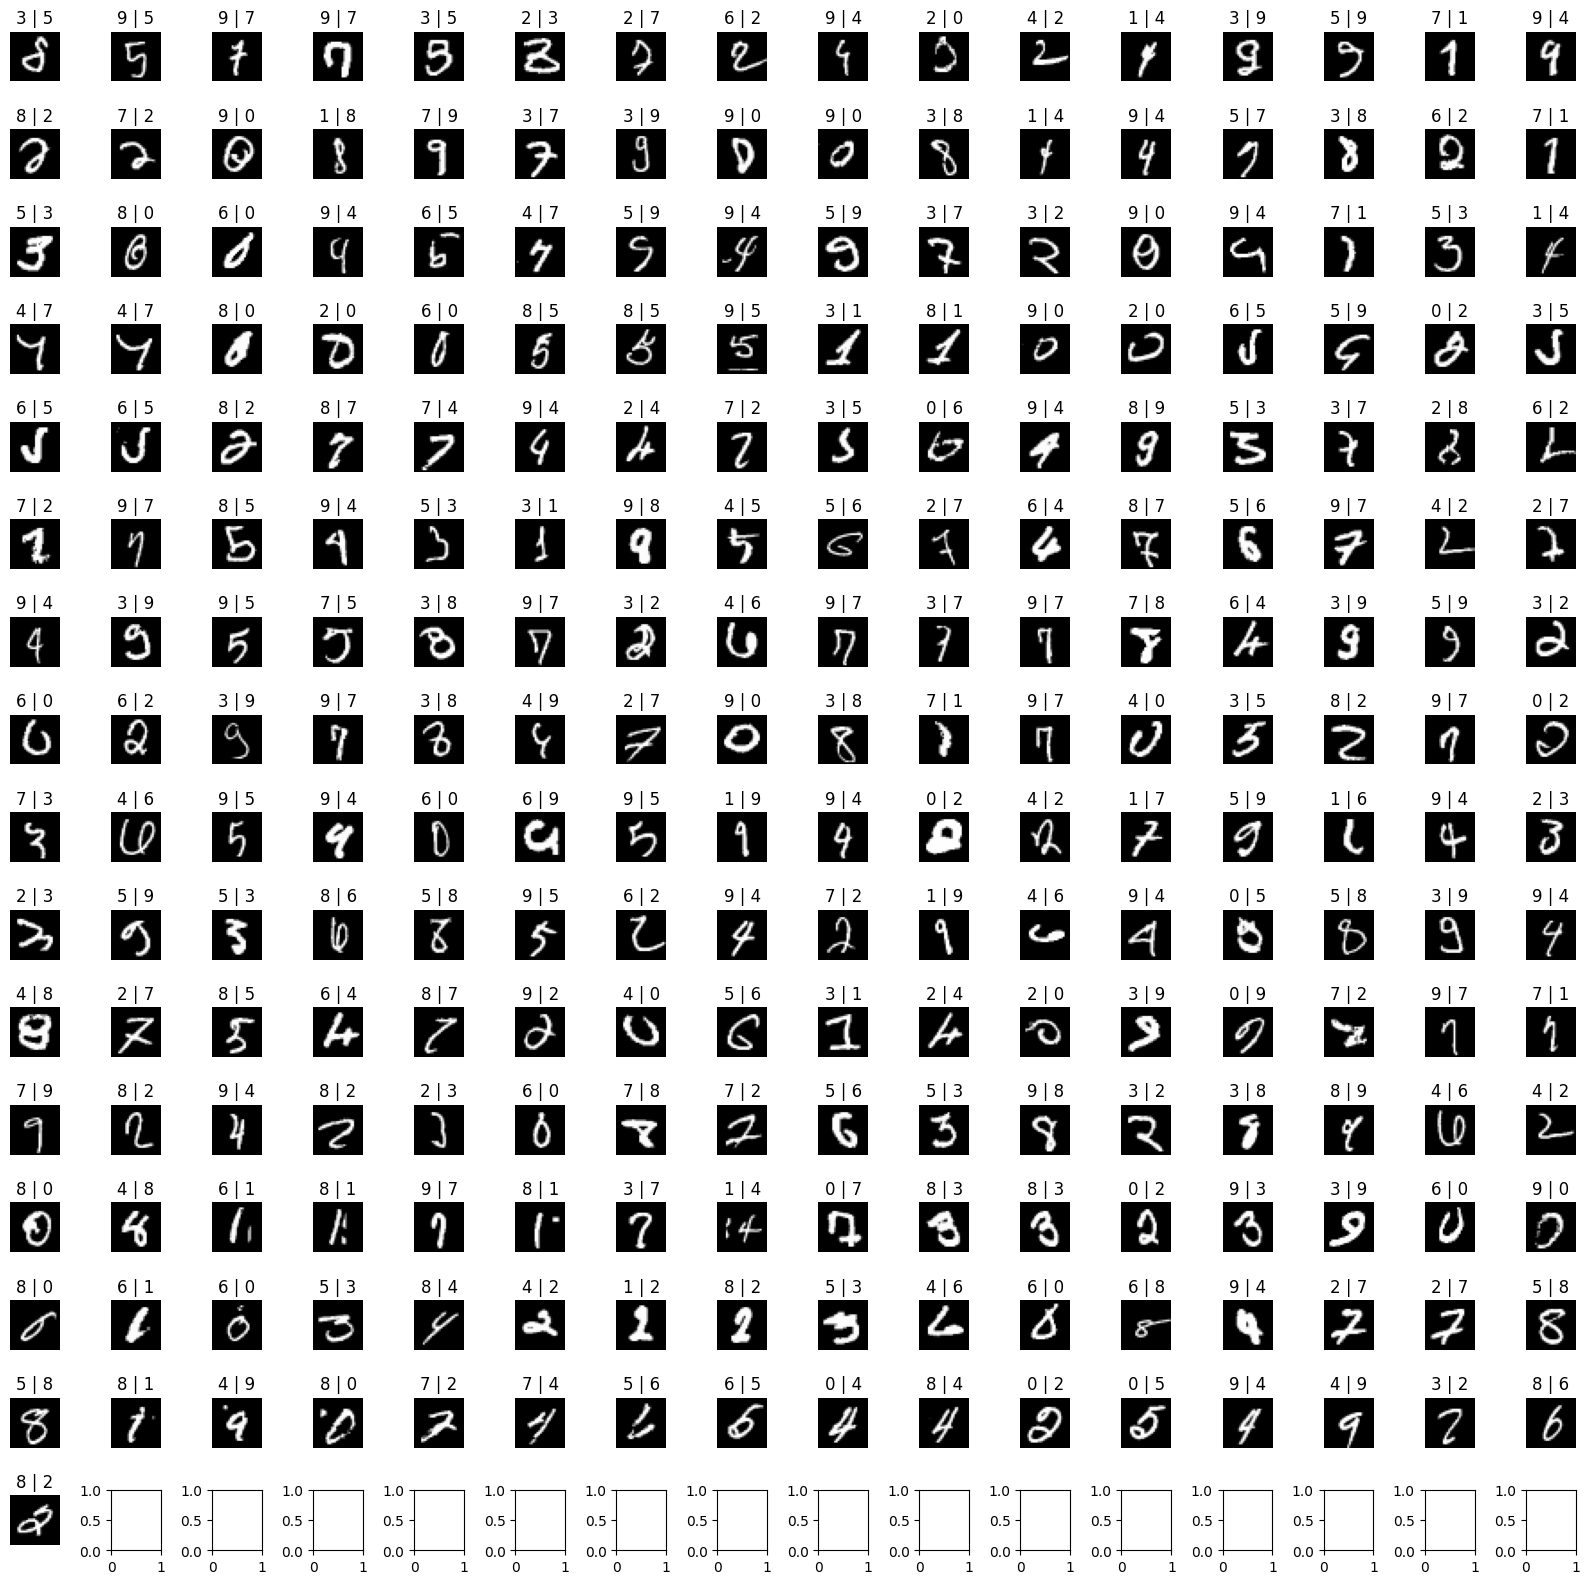

Total errors: 241 out of 14000


In [7]:
DisplayErrors(X_test, y_test, predictions)